In [2]:
import sympy as sym
sym.init_printing()

In [3]:
x, x0, x1, h = sym.symbols('x x0, x1, h')

In [4]:
def lagrange(n, x, vozlišča_predpona='x'):
    if isinstance(vozlišča_predpona, str):
        vozlišča = sym.symbols(f'{vozlišča_predpona}:{n}') 
    coeffs = []
    for i in range(0, n):
        numer = []
        denom = []

        for j in range(0, n):
            if i == j:
                continue

            numer.append(x    - vozlišča[j])
            denom.append(vozlišča[i] - vozlišča[j])
        
        numer = sym.Mul(*numer)
        denom = sym.Mul(*denom)

        coeffs.append(numer/denom)
    return coeffs    

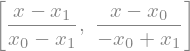

In [5]:
lag = lagrange(2, x)
lag

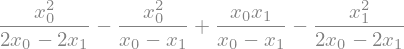

In [11]:
int0 = sym.integrate(lag[1], (x, x0, x1))
int0

In [12]:
int1 =int0.factor()

In [13]:
zamenjave = {x1: x0+h}
int1.subs(zamenjave)

In [10]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "4" 

In [7]:
import os
os.environ["OMP_NUM_THREADS"] = "4"  # Set the desired number of threads

import numpy as np

In [1]:
import numpy as np
import time

n = 1

def aa(n=100):
    tic = time.perf_counter()
    a = np.random.rand(1000, 1000)
        
    for i in range(n):
        ainv = np.linalg.inv(a)
    toc = time.perf_counter()
    return toc-tic

In [6]:
n=1000
print('Time: ',1000*(aa(n))/n, ' ms')

Time:  35.93310729999939  ms


In [7]:
from threadpoolctl import ThreadpoolController
import numpy as np
controller = ThreadpoolController()

def bb(n=100, threads=1):
    tic = time.perf_counter()
    a = np.random.rand(1000, 1000)

    with controller.limit(limits=threads, user_api='blas'):
        for i in range(n):
            ainv = np.linalg.inv(a)
        toc = time.perf_counter()
    return toc-tic

In [9]:
n=100
1000*bb(n, threads=12)/n

62.76603079999768

In [3]:
import numpy; numpy.show_runtime()

[{'numpy_version': '1.26.4',
  'python': '3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 '
            '64 bit (AMD64)]',
  'uname': uname_result(system='Windows', node='Spectre-JS', release='11', version='10.0.22631', machine='AMD64')},
 {'simd_extensions': {'baseline': ['SSE', 'SSE2', 'SSE3'],
                      'found': ['SSSE3',
                                'SSE41',
                                'POPCNT',
                                'SSE42',
                                'AVX',
                                'F16C',
                                'FMA3',
                                'AVX2'],
                      'not_found': ['AVX512F',
                                    'AVX512CD',
                                    'AVX512_SKX',
                                    'AVX512_CLX',
                                    'AVX512_CNL',
                                    'AVX512_ICL']}},
 {'architecture': 'Haswell',
  'filepath': 'C:\\Users\\janko\\

In [2]:
n=5
print('Time: ',1000*(aa(n))/n, ' ms')

Time:  12025.513820000924  ms
